# Preparing the enviroment and mounting data

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
#from google.colab import drive
#drive.mount("/content/drive/")
#cd drive/My Drive/SFU/Project4-Spring2021
!ls

sample_data


In [ ]:
!git clone https://github.com/JakeColtman/bartpy.git
!git clone https://github.com/raquelaoki/CompBioAndSimulated_Datasets.git

Cloning into 'bartpy'...
remote: Enumerating objects: 1971, done.
remote: Total 1971 (delta 0), reused 0 (delta 0), pack-reused 1971
Receiving objects: 100% (1971/1971), 11.97 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (1329/1329), done.
Cloning into 'CompBioAndSimulated_Datasets'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 5), reused 11 (delta 4), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
import pandas as pd
import numpy as np 
from scipy import sparse
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.insert(0,'bartpy/')
sys.path.insert(0,'CompBioAndSimulated_Datasets/')
from bartpy.sklearnmodel import SklearnModel
from fromBEDtoNPY import goPDX
import matplotlib.pyplot as plt
import seaborn as sns

data_preprocessing = False
run_learners = True

ModuleNotFoundError: ignored

# BCCH Data Analysis 

## Data 
There are two options: 
1. Pre-processing: require original files on the server and perform the pre-processing / filtering 
2. Load files saved on local machine 


In [ ]:
path = '/content/'
if data_preprocessing:  
  print('Option 1: Starting pre-processing:')
  data = goPDX(final=False)
  #import data_preprossing_functions as dpf
  #y, x_clinical, x_snps, x_colnames, x_clinical_names = dpf.run_preprocessing(path, True)
  #x_clinical = x_clinical.astype('float64')
  #print('Done!')
  #print('Shapes:',len(y), sum(y), x_clinical.shape, x_snps.shape, len(x_colnames), len(x_clinical_names))
  ##318 (318, 42) (318, 16641) 16641
else: 
  print('Option 2: Reading files')
  data = goPDX()

Option 2: Reading files
Loading final form:
Target Y:  302  items and  187  positive examples
Clinical:  302 items and  41  columns
SNPS:  302 items and  16195  columns


Making some plots

In [ ]:
clinical = pd.DataFrame(data.x_clinical, columns = data.x_clinical_names)
clinical = clinical.drop(['TumorType','PC1','PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','Array'],1)

In [ ]:
from scipy.stats import chi2_contingency
tab = confusion_matrix(data.y,clinical['Sex (1=male, 0=female)'])
print(tab)
chi2, p, dof, ex  = chi2_contingency(tab)
print('P-value', p)
if p<0.05: 
  print('We dont have enought evidence to reject null hypothesis (Values are independent)')
else: 
  print('We have enought evidence to reject null hypothesis (values are dependent)')

[[ 63  52]
 [ 80 107]]
P-value 0.056167153377689495
We have enought evidence to reject null hypothesis (values are dependent)


[27.17391304347826, 13.793103448275861, 24.137931034482758, 53.06122448979592, 58.8235294117647, 85.0] [72.82608695652173, 86.20689655172414, 75.86206896551724, 46.93877551020408, 41.1764705882353, 15.0]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


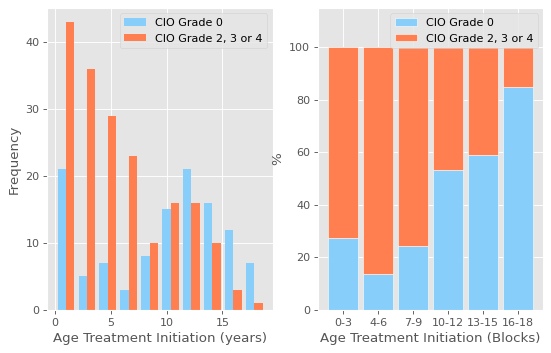

In [ ]:
clinical01 = clinical.copy()
#clinical01['y'] = data.y
clinical01['AgeTreatmentInitiation (Blocks)'] = pd.cut(clinical01['AgeTreatmentInitiation (years)'],bins=[0,3,6,9,12,15,18],labels=['0-3','4-6','7-9','10-12','13-15','16-18'])
clinical0 = clinical01[data.y==0]
clinical1 = clinical01[data.y==1]


from matplotlib import pyplot
plt.style.use('ggplot')
figure(figsize=(8,5), dpi=80)


plt.subplot(1, 2, 1)
plt.hist([clinical0['AgeTreatmentInitiation (years)'], clinical1['AgeTreatmentInitiation (years)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Age Treatment Initiation (years)')
plt.ylabel('Frequency')

bar0, bar1 = [],[]
#clinical01['AgeTreatmentInitiation (Blocks)']
blocks = ['0-3','4-6','7-9','10-12','13-15','16-18']
for b in blocks:
   subset = data.y[clinical01['AgeTreatmentInitiation (Blocks)']==b]
   bar0.append(100*(len(subset)-subset.sum())/len(subset))
   bar1.append(100*(subset.sum())/len(subset))

print(bar0, bar1)
plt.subplot(1, 2, 2)
bar0 = bar0
bar1 = bar1
r = [0,1,2,3,4,5]
barWidth = 0.85
plt.bar(r, bar0, color='lightskyblue', edgecolor='white', width=barWidth, label="CIO Grade 0")
plt.bar(r, bar1, bottom=bar0, color='coral', edgecolor='white', width=barWidth, label="CIO Grade 2, 3 or 4")
plt.xticks(r, blocks)
plt.xlabel("Age Treatment Initiation (Blocks)")
plt.ylabel("%")
plt.ylim(0,115)
plt.legend(loc='upper right')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 



[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


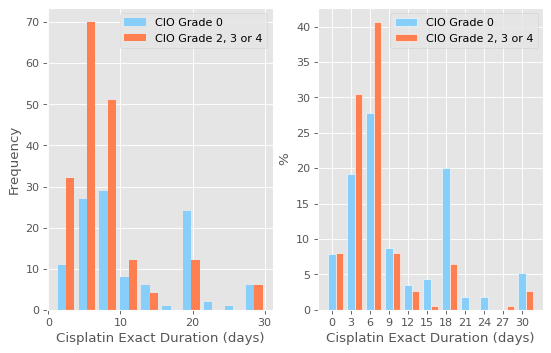

In [ ]:
figure(figsize=(8,5), dpi=80)

plt.subplot(1, 2, 1)

plt.hist([clinical0['CisplatinExactDuration (days)'], clinical1['CisplatinExactDuration (days)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Cisplatin Exact Duration (days)')
plt.ylabel('Frequency')

bar0, bar1 = [],[]
#clinical01['AgeTreatmentInitiation (Blocks)']
blocks = list(range(0,33,3))
print(blocks)
array = clinical01['CisplatinExactDuration (days)']
for b in blocks:
   filter = [True if item == b or item==b+1 or item == b+2 else False for item in array]
   subset = data.y[filter]
   bar0.append(100*(len(subset)-subset.sum())/clinical0.shape[0])
   bar1.append(100*(subset.sum())/clinical1.shape[0])

plt.subplot(1, 2, 2)
r = np.array(list(range(len(blocks))))
barWidth = 0.4

plt.bar(r, bar0, color='lightskyblue', edgecolor='white', width=barWidth, label="CIO Grade 0")
plt.bar(r+barWidth, bar1,color='coral', edgecolor='white', width=barWidth, label="CIO Grade 2, 3 or 4")
plt.xticks(r, blocks)
plt.xlabel("Cisplatin Exact Duration (days)")
plt.ylabel("%")
plt.legend(loc='upper right')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


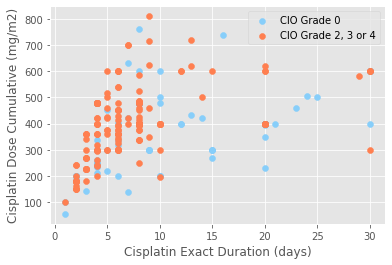

In [ ]:
b = ['0-3','4-6','7-9','10-12','13-15','16-18']

plt.scatter(clinical0['CisplatinExactDuration (days)'],clinical0['CisplatinDose_cumulative (mg/m2)'],label='CIO Grade 0',color='lightskyblue')
plt.scatter(clinical1['CisplatinExactDuration (days)'],clinical1['CisplatinDose_cumulative (mg/m2)'],label='CIO Grade 2, 3 or 4',color ='coral')
plt.xlabel('Cisplatin Exact Duration (days)')
plt.ylabel('Cisplatin Dose Cumulative (mg/m2)')
plt.legend(loc='upper right')


(0.0, 1000.0)

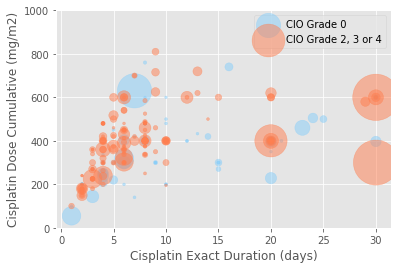

In [ ]:
age0 = (1/clinical0['AgeTreatmentInitiation (years)'])*100
age1 = (1/clinical1['AgeTreatmentInitiation (years)'])*100
plt.scatter(clinical0['CisplatinExactDuration (days)'],clinical0['CisplatinDose_cumulative (mg/m2)'],
            label='CIO Grade 0',color='lightskyblue', s=age0,alpha=0.5)
plt.scatter(clinical1['CisplatinExactDuration (days)'],clinical1['CisplatinDose_cumulative (mg/m2)'],
            label='CIO Grade 2, 3 or 4',color ='coral',s=age1,alpha=0.5)
plt.xlabel('Cisplatin Exact Duration (days)')
plt.ylabel('Cisplatin Dose Cumulative (mg/m2)')
plt.legend(loc='upper right')
plt.ylim(0,1000)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.0, 800.0)

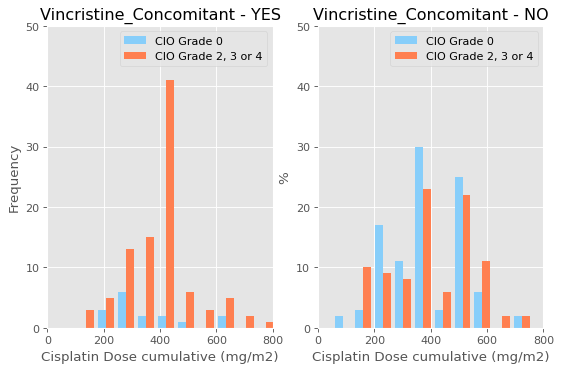

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8,5), dpi=80)

clinical00 = clinical0[clinical0['Vincristine_Concomitant (1=yes,0=no)']==0]
clinical01 = clinical0[clinical0['Vincristine_Concomitant (1=yes,0=no)']==1]

clinical10 = clinical1[clinical1['Vincristine_Concomitant (1=yes,0=no)']==0]
clinical11 = clinical1[clinical1['Vincristine_Concomitant (1=yes,0=no)']==1]

plt.subplot(1, 2, 1)
plt.hist([clinical01['CisplatinDose_cumulative (mg/m2)'], clinical11['CisplatinDose_cumulative (mg/m2)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Cisplatin Dose cumulative (mg/m2)')
plt.ylabel('Frequency')
plt.title('Vincristine_Concomitant - YES')
plt.ylim(0,50)
plt.xlim(0,800)

plt.subplot(1, 2, 2)
plt.hist([clinical00['CisplatinDose_cumulative (mg/m2)'], clinical10['CisplatinDose_cumulative (mg/m2)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Cisplatin Dose cumulative (mg/m2)')
plt.ylabel('%')
plt.title('Vincristine_Concomitant - NO')
plt.ylim(0,50)
plt.xlim(0,800)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Head And Neck Radiation - NO')

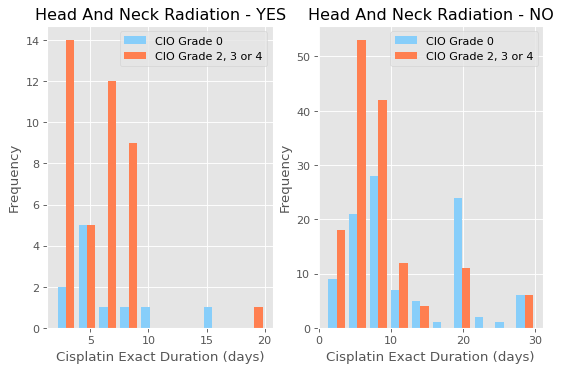

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8,5), dpi=80)

clinical00 = clinical0[clinical0['HeadAndNeckRadiation (1=yes,0=no)']==0]
clinical01 = clinical0[clinical0['HeadAndNeckRadiation (1=yes,0=no)']==1]

clinical10 = clinical1[clinical1['HeadAndNeckRadiation (1=yes,0=no)']==0]
clinical11 = clinical1[clinical1['HeadAndNeckRadiation (1=yes,0=no)']==1]

plt.subplot(1, 2, 1)
plt.hist([clinical01['CisplatinExactDuration (days)'], clinical11['CisplatinExactDuration (days)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Cisplatin Exact Duration (days)')
plt.ylabel('Frequency')
plt.title('Head And Neck Radiation - YES')

plt.subplot(1, 2, 2)
plt.hist([clinical00['CisplatinExactDuration (days)'], clinical10['CisplatinExactDuration (days)']]
         ,label=['CIO Grade 0', 'CIO Grade 2, 3 or 4'], color = ['lightskyblue','coral'])
plt.legend(loc='upper right')
plt.xlabel('Cisplatin Exact Duration (days)')
plt.ylabel('Frequency')
plt.title('Head And Neck Radiation - NO')



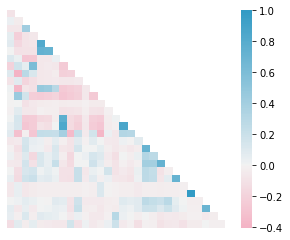

In [ ]:
#corrMatrix.shape
#sns.color_palette("vlag", as_cmap=True)
# color map
corrMatrix = clinical.corr()
mask = np.triu(np.ones_like(range(corrMatrix.shape[0]), dtype=np.bool))
mask = mask[1:, :-1]
corr = corrMatrix.iloc[1:,:-1].copy()
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr, mask=mask, xticklabels=False, yticklabels=False, cmap=cmap, square = True, center=0)
plt.show()


In [ ]:
corr = corrMatrix.iloc[1:,:-1].copy()
value = corr.columns
corr.reset_index(inplace=True,drop=False)
melted = pd.melt(corr,id_vars=['index'], value_vars = value)
a = melted[melted['value']>0.3]
b = melted[melted['value']<-0.3]
melted_ = pd.concat([a,b])
melted_ = melted_[melted_['index']!=melted_['variable']]
melted_['abs'] = np.abs(melted_['value'])
melted_ = melted_.sort_values('abs', ascending=False)
melted_.reset_index(inplace=True,drop=True)
melted_.reset_index(inplace=True,drop=False)



## ParKCa

1. Learners: Deconfounder, BART



In [ ]:
import train as parkca
import eval as evaluation
import time 
learners = False
if learners: 
  X1 = preprocessing.MinMaxScaler().fit_transform(data.x_clinical)
  X = np.concatenate([X1,data.x_snps], axis = 1)

  coef = parkca.learners(['DA','noise'],X,data.y,data.x_snps_names, colnamesZ = data.x_clinical_names) #bart is time consuming
  #coef = parkca.learners(['CEVAE'],X,y,x_colnames, colnamesZ = x_clinical_names) #SAVED
  z = np.load("cevae_cate_checkpoints_z.npy")
  a = np.load("cevae_cate_checkpoints_a.npy")
  b = np.load("cevae_cate_checkpoints_b.npy")
  c = np.load("cevae_cate_checkpoints_c.npy")
  d = np.load("cevae_cate_checkpoints_d.npy")
  e = np.load("cevae_cate_checkpoints_e.npy")
  f = np.load("cevae_cate_checkpoints_f.npy")

  print(len(z)+len(a)+len(b)+len(c)+len(d)+len(e)+len(f))
  z = [item for sublist in z for item in sublist]
  a = [item for sublist in a for item in sublist]
  b = [item for sublist in b for item in sublist]
  c = [item for sublist in c for item in sublist]
  d = [item for sublist in d for item in sublist]
  e = [item for sublist in e for item in sublist]
  f = [item for sublist in f for item in sublist]

  cevae_coef = np.concatenate([z,a,b,c,d,e,f], 0)
  print(len(cevae_coef))
  coef['CEVAE'] = cevae_coef
  np.save('level1data',coef)
  level1data = coef
else: 
  level1data = np.load('level1data.npy', allow_pickle=True)
  level1data = pd.DataFrame(level1data, columns = ['causes','DA','noise','cevae'])
  print(level1data.head())

level1data['y'] = 0
level1data['y'] = [1 if i in data.known_snps else 0 for i in level1data['causes'].values]



Instructions for updating:
non-resource variables are not supported in the long term
Available devices  1
Current cuda device  0
        causes         DA     noise      cevae
0  1_rs3820011   0.198838   0.78991 -0.0321922
1  1_rs6605080  -0.271758 -0.735683  -0.232704
2   1_rs383968  0.0702615   2.11437  -0.120306
3  1_rs2743979   -0.14591  0.930926  -0.108644
4  1_rs4648564   0.182521 -0.192133   0.305462


In [ ]:
level1data.set_index('causes', inplace=True, drop=True)
level1data = parkca.data_norm(level1data)
roc, output, y_full_prob = parkca.meta_learner(level1data.fillna(0), ['lr','nn','upu','rf'],'y')


Meta-learner: LR
Meta-learner: NN
Meta-learner: UPU
Library Missing
Check: https://github.com/t-sakai-kure/pywsl
Meta-learner: RF


In [ ]:
output_potential_causes, output_potential_causes_signal  = [], []
output_missing_causes, output_missing_causes_signal, output_confirmed_causes  = [], [],[]

for i in range(len(output['rf'])): 
    if output['rf'][i]==1: 
        output_potential_causes.append(output.index[i])
        output_potential_causes_signal.append(y_full_prob[i,1])
        if output.index[i] in data.known_snps: 
            output_confirmed_causes.append(output.index[i])           
    elif output['rf'][i]==0 and output.index[i] in data.known_snps: 
        output_missing_causes.append(output.index[i])
        #snps.append(data1.index[i])
        output_missing_causes_signal.append(y_full_prob[i,1])
    else: 
      pass 

In [ ]:
print("Missing Causes:", len(output_missing_causes))
print("Confirmed Causes:", len(output_confirmed_causes))
print("New Potential Causes:", len(output_potential_causes)-len(output_confirmed_causes))

np.savetxt('output_missing_causes.txt', output_missing_causes,fmt='%s')
np.savetxt('output_confirmed_causes.txt', output_confirmed_causes,fmt='%s')
np.savetxt('output_potential_causes.txt', output_potential_causes,fmt='%s')
np.savetxt('output_potential_causes_signal.txt', output_potential_causes_signal,fmt='%s')
np.savetxt('output_missing_causes_signal.txt', output_missing_causes_signal,fmt='%s')

Missing Causes: 35
Confirmed Causes: 32
New Potential Causes: 127


# Predictive Models 

In [ ]:
output_missing_causes = np.loadtxt('output_missing_causes.txt', dtype=np.str)
output_confirmed_causes = np.loadtxt('output_confirmed_causes.txt', dtype=np.str)
output_potential_causes = np.loadtxt('output_potential_causes.txt', dtype=np.str)
output_potential_causes_signal= np.loadtxt('output_potential_causes_signal.txt', dtype=np.str)
output_missing_causes_signal = np.loadtxt('output_missing_causes_signal.txt', dtype=np.str)

if data_preprocessing:  
  print('Option 1: Starting pre-processing:')
  data = goPDX(final=False)
  #import data_preprossing_functions as dpf
  #y, x_clinical, x_snps, x_colnames, x_clinical_names = dpf.run_preprocessing(path, True)
  #x_clinical = x_clinical.astype('float64')
  #print('Done!')
  #print('Shapes:',len(y), sum(y), x_clinical.shape, x_snps.shape, len(x_colnames), len(x_clinical_names))
  ##318 (318, 42) (318, 16641) 16641
else: 
  print('Option 2: Reading files')
  data = goPDX()

Option 2: Reading files
Loading final form:
Target Y:  302  items and  187  positive examples
Clinical:  302 items and  41  columns
SNPS:  302 items and  16195  columns


In [ ]:
# Option 1: using the 300
# option 2: using the != potential (known)
# option 3: using the confirmedis (-potential - missing)
# option 4: using only clinical information (sex, ..., )
# option 5: Random

from random import sample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def predict_outcome(y_train, y_test, X_train, X_test, lr, clinical, clinical_len, snpsbool, filter):
    w = len(y_train) / y_train.sum()
    sample_weight = np.array([w if i == 1 else 1 for i in y_train])
    if lr: 
      model = LogisticRegression()
      tag = 'Logistic Regression'
      model.fit(X_train, y_train, sample_weight=sample_weight)
      if clinical: 
        coef = model.coef_[0][0:clinical_len]
        start = clinical_len
      else: 
        coef = []
        start = 0
      if snpsbool: 
        end = X_train.shape[1]
        # print('Lengths:', len(filter),len(np.abs(model.coef_[0][start:end])))
        temp = pd.DataFrame({'Coef':filter,
                        'Value':np.abs(model.coef_[0][start:end])})
        coefsnps =  temp.sort_values(by=['Value'], ascending = False)[0:5]['Coef']
      else: 
        coefanps = []
    
    else:
      model = RandomForestClassifier(max_depth=6, random_state=0)
      tag = 'Random Forest'
      model.fit(X_train, y_train, sample_weight=sample_weight)
      if clinical: 
        coef = model.feature_importances_[0:clinical_len]
        start = clinical_len
      else: 
        coef = []
        start = 0
      if snpsbool:
        end = X_train.shape[1]
        #print('Lengths:', len(filter),len(np.abs(model.feature_importances_[start:end])))
        temp = pd.DataFrame({'Coef':filter,
                        'Value':np.abs(model.feature_importances_[start:end])})
        coefsnps =  temp.sort_values(by=['Value'], ascending = False)[0:5]['Coef']
      else: 
        coefanps = []


    y_train_p = model.predict(X_train)
    y_test_p = model.predict(X_test)

    f1_train = roc_auc_score(y_train, y_train_p)
    f1_test = roc_auc_score(y_test, y_test_p)

    p_train = precision_score(y_train, y_train_p)
    p_test = precision_score(y_train, y_train_p)

    r_train = recall_score(y_train, y_train_p)
    r_test = recall_score(y_train, y_train_p)


    return tag, f1_train, p_train, r_train, f1_test, p_test, r_test , coef , coefsnps 

def predictive_models_comp(data, filter, tag,typemodel, clinical = True, snps = True, clinical_filter = None):
    
    # print(option)
    if clinical: 
      tag1 = 'Yes'
    else: 
      tag1 = '-'

    remove = []
    for i in range(len(data.x_snps_names)):
        if data.x_snps_names[i] not in filter:
            remove.append(i)

    X = np.delete(data.x_snps, remove, axis=1)
    colX = np.delete(data.x_snps_names, remove, axis=0)

    y = data.y
    scaler = MinMaxScaler()

    if clinical_filter is not None: 
      print('Reducing Clinical')
      remove_c = []
      for i in range(len(data.x_clinical_names)):
        if data.x_clinical_names[i] not in clinical_filter:
          remove_c.append(i)
      Xc = np.delete(data.x_clinical,remove_c,axis = 1)
      colXc = np.delete(data.x_clinical_names,remove_c, axis = 0)
      print('Clinical Feature order',colXc)
      Z = scaler.fit_transform(Xc)
    else: 
      Z = scaler.fit_transform(data.x_clinical)
    if clinical and not snps:
        X = Z
    elif snps and not clinical: 
        X = X
    else:
        X = np.concatenate([Z, X], axis=1)

    if clinical_filter is not None: 
      print(X.shape)

    rep = 30
    f1_train, f1_test = np.zeros(rep), np.zeros(rep)
    for seed in range(rep):
      y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.3, random_state=seed) #8
      model, f1_train[seed], p_train, r_train, f1_test[seed], p_test, r_test, coef, coefsnps = predict_outcome(y_train, y_test, X_train, X_test,typemodel, clinical, Z.shape[1], snps, colX)
      
    roc = {'Clinical': tag1,'SNPs':tag,'model':model, 'f1_train':f1_train.mean(), 'f1_train_sd':np.std(f1_train), 
           'f1_test': f1_test.mean(), 'f1_test_sd':np.std(f1_test), 'coef':coef, 'coefsnps':coefsnps}
    #roc = {'type': tag,'model':model, 'f1_train':f1_train, 'p_train':p_train, 'r_train':r_train,
    #       'f1_test': f1_test, 'p_test':p_test, "r_test":r_test}
    return roc


In [ ]:
roc_table = pd.DataFrame(columns=['Clinical','SNPs','model', 'f1_train', 'f1_train_sd','f1_test','f1_test_sd', 'coef','coefsnps'])
roc_table = roc_table.append(predictive_models_comp(data,output_potential_causes,'All Potential Causes',True,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,output_potential_causes,'All Potential Causes',False,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, data.known_snps,'Known SNPS',True,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, data.known_snps,'Known SNPS',False,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, output_confirmed_causes,'Confirmed SNPS',True,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, output_confirmed_causes,'Confirmed SNPS',False,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, [],'-',True,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, [],'-',False,True,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,sample(list(data.x_snps_names),40),'Random',True,True,True ), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,sample(list(data.x_snps_names),40),'Random',False,True,True ), ignore_index=True)

roc_table = roc_table.append(predictive_models_comp(data,output_potential_causes,'All Potential Causes',True,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,output_potential_causes,'All Potential Causes',False,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, data.known_snps,'Known SNPS',True,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, data.known_snps,'Known SNPS',False,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, output_confirmed_causes,'Confirmed SNPS',True,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data, output_confirmed_causes,'Confirmed SNPS',False,False,True), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,sample(list(data.x_snps_names),40),'Random',True,False,True ), ignore_index=True)
roc_table = roc_table.append(predictive_models_comp(data,sample(list(data.x_snps_names),40),'Random',False,False,True ), ignore_index=True)



In [ ]:
top5coef = []
top5snps = []

for i in range(roc_table.shape[0]):
  if roc_table['Clinical'][i] =='Yes':
    temp = pd.DataFrame({'Coef':data.x_clinical_names,
                        'Value':np.abs(roc_table['coef'][i][0:len(data.x_clinical_names)]) })
    top5coef.append(temp.sort_values(by=['Value'], ascending = False)[0:5]['Coef'].values)
  else: 
    top5coef.append([])
  if roc_table['SNPs'][i] !='-':
    top5snps.append(roc_table['coefsnps'][i])
  
roc_table['top5'] = top5coef


NameError: ignored

Most important clinical features:

In [ ]:
from collections import Counter
#
#[-2.49402482 -1.30851286 0.6116446  1.25946129]
#['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)''HeadAndNeckRadiation (1=yes,0=no)''Vincristine_Concomitant (1=yes,0=no)']
counts = [item for sublist in top5coef for item in sublist]
df = pd.DataFrame.from_dict(Counter(counts), orient='index').reset_index()
print(df.head())
topclinical = ['AgeTreatmentInitiation (years)','CisplatinExactDuration (days)','Vincristine_Concomitant (1=yes,0=no)','HeadAndNeckRadiation (1=yes,0=no)']
print(topclinical)
#topsnps = ['2_rs9941697' '5_rs1347147' '19_rs3212986' '9_rs7851395' '17_rs1051640'
# '6_rs451774' '1_rs1801133&COSM146404&COSM3927609']

                                  index   0
0        AgeTreatmentInitiation (years)  10
1  Vincristine_Concomitant (1=yes,0=no)   9
2         CisplatinExactDuration (days)   8
3     HeadAndNeckRadiation (1=yes,0=no)   4
4   Vancomycin_Concomitant (1=yes,0=no)   1
['AgeTreatmentInitiation (years)', 'CisplatinExactDuration (days)', 'Vincristine_Concomitant (1=yes,0=no)', 'HeadAndNeckRadiation (1=yes,0=no)']


In [ ]:
counts = [item for sublist in top5snps for item in sublist]
df = pd.DataFrame.from_dict(Counter(counts), orient='index').reset_index()
df.columns = ['SNPs','freq']
df = df[df['freq']>2].SNPs.values
print(df)


['2_rs9941697' '5_rs1347147' '19_rs3212986' '9_rs7851395' '17_rs1051640'
 '6_rs451774' '1_rs1801133&COSM146404&COSM3927609']


In [ ]:
#TOP MODEL: 
topsnps = ['2_rs9941697', '5_rs1347147' ,'19_rs3212986', '9_rs7851395', '17_rs1051640', '6_rs451774', '1_rs1801133&COSM146404&COSM3927609']
topclinical = ['AgeTreatmentInitiation (years)','CisplatinExactDuration (days)','Vincristine_Concomitant (1=yes,0=no)','HeadAndNeckRadiation (1=yes,0=no)']
print(len(topsnps),len(topclinical))

roc_table2 = pd.DataFrame(columns=['Clinical','SNPs','model', 'f1_train', 'f1_train_sd','f1_test','f1_test_sd', 'coef','coefsnps'])
roc_table2 = roc_table2.append(predictive_models_comp(data,topsnps,'top features',True,True,True,topclinical), ignore_index=True)
roc_table2 = roc_table2.append(predictive_models_comp(data,topsnps,'top features',False,True,True,topclinical), ignore_index=True)
roc_table2 = roc_table2.append(predictive_models_comp(data,topsnps,'top snps',True,False,True,topclinical), ignore_index=True)
roc_table2 = roc_table2.append(predictive_models_comp(data,topsnps,'top snps',False,False,True,topclinical), ignore_index=True)
roc_table2 = roc_table2.append(predictive_models_comp(data,[],'top clinical',True,True,True,topclinical), ignore_index=True)
roc_table2 = roc_table2.append(predictive_models_comp(data,[],'top clinical',False,True,True,topclinical), ignore_index=True)
#roc_table2.to_csv('roc_table2.csv')


7 4
Reducing Clinical
Clinical Feature order ['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)'
 'HeadAndNeckRadiation (1=yes,0=no)'
 'Vincristine_Concomitant (1=yes,0=no)']
(302, 11)
Reducing Clinical
Clinical Feature order ['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)'
 'HeadAndNeckRadiation (1=yes,0=no)'
 'Vincristine_Concomitant (1=yes,0=no)']
(302, 11)
Reducing Clinical
Clinical Feature order ['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)'
 'HeadAndNeckRadiation (1=yes,0=no)'
 'Vincristine_Concomitant (1=yes,0=no)']
(302, 7)
Reducing Clinical
Clinical Feature order ['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)'
 'HeadAndNeckRadiation (1=yes,0=no)'
 'Vincristine_Concomitant (1=yes,0=no)']
(302, 7)
Reducing Clinical
Clinical Feature order ['AgeTreatmentInitiation (years)' 'CisplatinExactDuration (days)'
 'HeadAndNeckRadiation (1=yes,0=no)'
 'Vincristine_Concomitant (1=yes,0=no)']
(302, 4)
Reducing Clinical
Clinic

In [ ]:
roc_table2

,Clinical,SNPs,model,f1_train,f1_train_sd,f1_test,f1_test_sd,coef,coefsnps
0,Yes,top features,Logistic Regression,0.717979,0.024990,0.680221,0.042817,"[-2.3047990762838673, -1.2359837168186598, 0.6...",4 9_rs7851395 6 ...
1,Yes,top features,Random Forest,0.855164,0.019405,0.656819,0.037441,"[0.41612374485557935, 0.1863505936644105, 0.04...",6 5_rs1347147 4 9_rs7851395 0 2_rs...
2,-,top snps,Logistic Regression,0.568304,0.035505,0.543583,0.030574,[],6 5_rs1347147 5 17_rs1051640 4 9_rs...
3,-,top snps,Random Forest,0.607084,0.032776,0.553727,0.040302,[],6 5_rs1347147 4 ...
4,Yes,top clinical,Logistic Regression,0.666842,0.028897,0.645636,0.041952,"[-2.494024816365277, -1.308512860814862, 0.611...","Series([], Name: Coef, dtype: object)"
5,Yes,top clinical,Random Forest,0.863704,0.023679,0.636099,0.038134,"[0.6346456272589348, 0.23673612092166496, 0.03...","Series([], Name: Coef, dtype: object)"


In [ ]:
#making a NN with top 12 features
import torch
import torch.nn as nn
from torch import optim, Tensor
import torch.distributions
import torch.nn.functional as F
from torch.distributions import bernoulli, normal
from torch.utils.data import Dataset, DataLoader, TensorDataset
# https://stackabuse.com/introduction-to-pytorch-for-classification/
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score


print('Available devices ', torch.cuda.device_count())
print('Current cuda device ', torch.cuda.current_device())
cuda = torch.device('cuda')


class Model(nn.Module):

    def __init__(self, input_size, output_size, layers, p=0.4):
        super().__init__()
        self.dropout = nn.Dropout(p)
        all_layers = []
        self.softmax = nn.Softmax(dim=1)
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.Tanh())
            #all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, X):
        x = self.layers(X)
        x = self.softmax(x)
        return x

Available devices  1
Current cuda device  0


In [ ]:
#y = Tensor(data.y)
scaler = MinMaxScaler()

remove_c, remove_s = [],[]
for i in range(len(data.x_clinical_names)):
  if data.x_clinical_names[i] not in topclinical:
    remove_c.append(i)
for i in range(len(data.x_snps_names)):
  if data.x_snps_names[i] not in topsnps:
    remove_s.append(i)

Xc = np.delete(data.x_clinical,remove_c,axis = 1)
Xs = np.delete(data.x_snps,remove_s, axis =1)
Z = scaler.fit_transform(Xc)
X = np.concatenate([Z,Xs],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, data.y, test_size=0.33, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

dataset_train = TensorDataset(Tensor(X_train), Tensor(y_train))
dataset_test = TensorDataset(Tensor(X_test), Tensor(y_test))
dataset_val = TensorDataset(Tensor(X_val), Tensor(y_val))

loader_train = DataLoader(dataset_train, shuffle=True, batch_size=30)
loader_test = DataLoader(dataset_test, shuffle=False, batch_size=X_test.shape[0])
loader_val = DataLoader(dataset_val, shuffle=False, batch_size=X_val.shape[0])

In [ ]:
def simple_classifier(input, output, layers, p,loader_train, loader_test, loader_val, epochs = 150 ):
  aggregated_losses = []
  auc, f1, loss_val = np.zeros(epochs), np.zeros(epochs), np.zeros(epochs)
  model = Model(input, output, layers, p).cuda()
  #model = Model(X.shape[1], 2, [10,10], p=0.4).cuda()
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  for i in range(epochs):
    auc_mean, loss_mean, f1_mean = 0,0,0
    for j, batch in enumerate(loader_train):
      optimizer.zero_grad()
      train_y_pred = model(batch[0].cuda())
      loss= criterion(train_y_pred, batch[1].long().cuda())
      loss.backward()
      optimizer.step()
      train_y_pred = train_y_pred.reshape(train_y_pred.shape[0],2)[:,1].cpu().detach().numpy()
      auc_mean += roc_auc_score(batch[1],train_y_pred)  
      loss_mean += loss 
      train_y_pred = [1 if item > 0.5 else 0 for item in train_y_pred]
      f1_mean += f1_score(batch[1], train_y_pred) 
    aggregated_losses.append(loss_mean.cpu().detach().numpy()/j)
    #validation
    batch = next(iter(loader_val))
    val_y_pred = model(batch[0].cuda())
    loss_val[i] = criterion(val_y_pred, batch[1].long().cuda()).cpu().detach().numpy()
    auc[i] = auc_mean/j
    f1[i] = f1_mean/j

    #if i%50 == 0:
    #    print(f'epoch: {i:3} loss: {loss.cpu().detach().numpy():10.8f}')
    i += 1
  batch = next(iter(loader_test))
  test_y_pred = model(batch[0].cuda())

  test_y_pred = test_y_pred.reshape(test_y_pred.shape[0],2)[:,1].cpu().detach().numpy()
  auc_test = roc_auc_score(batch[1],test_y_pred)  
  test_y_pred = [1 if item > 0.5 else 0 for item in test_y_pred]
  f1_test = f1_score(batch[1], test_y_pred) 

  #print('Metrics Testing set')
  #print('Auc', auc_test)
  #print('F1', f1_test)    
  #print('Metrics Traning Set')
  #print('AUC from', auc[0],' to ', auc[-1])
  #print('F1 from', f1[0],' to ', f1[-1])
  return aggregated_losses, loss_val, auc, f1, auc_test, f1_test



In [ ]:
epochs = 100
rep = 20
#exploring parameters: 
layers = [[4,4], [10,4],[9,3], [9,6,3], [12,3]]
train_auc, train_f1, test_auc, test_f1 = np.zeros(len(layers)), np.zeros(len(layers)), np.zeros(len(layers)), np.zeros(len(layers))

for i, setting in enumerate(layers): 
  train_auc_, train_f1_, test_auc_, test_f1_ = 0,0,0,0
  print('Running...', i, setting)
  for r in range(rep):
    aggregated_losses, loss_val, auc, f1, auc_t, f1_t= simple_classifier(X.shape[1], 2,setting, 0.4, loader_train, loader_test, loader_val, epochs = epochs)
    train_auc_+= auc[-1]
    train_f1_ += f1[-1]
    test_auc_ += auc_t
    test_f1_ += f1_t
  train_auc[i], train_f1[i], test_auc[i], test_f1[i] = train_auc_/rep, train_f1_/rep, test_auc_/rep, test_f1_/rep  



Running... 0 [4, 4]
Running... 1 [10, 4]
Running... 2 [9, 3]
Running... 3 [9, 6, 3]
Running... 4 [12, 3]


In [ ]:
output = pd.DataFrame({'Layers':layers,'train_auc':train_auc, 
                      'train_f1': train_f1, 'test_auc':test_auc, 
                      'test_f1':test_f1})
print(output)
'''
100 epochs and 0.4 dropout 
         Layers  train_auc  train_f1  test_auc   test_f1
0        [4, 4]   0.787342  0.896620  0.654679  0.796417
1        [8, 8]   0.878540  0.919917  0.748619  0.800893
2      [10, 10]   0.899645  0.933157  0.736898  0.786487
3      [12, 12]   0.913372  0.943850  0.742469  0.786332
4     [4, 4, 4]   0.730809  0.872506  0.627986  0.778127
5  [10, 10, 10]   0.900927  0.928287  0.753298  0.810268
6     [8, 4, 8]   0.823595  0.885804  0.682219  0.785523
7       [10, 4]   0.868208  0.918503  0.728431  0.799691
      Layers  train_auc  train_f1  test_auc   test_f1
0     [4, 4]   0.888971  0.938774  0.751604  0.797189
1    [10, 4]   0.916550  0.951344  0.756373  0.804032
2     [9, 3]   0.885514  0.934539  0.765285  0.810014
3  [9, 6, 3]   0.877695  0.941563  0.746390  0.811680
4    [12, 3]   0.902860  0.949536  0.752273  0.798524
'''

      Layers  train_auc  train_f1  test_auc   test_f1
0     [4, 4]   0.888971  0.938774  0.751604  0.797189
1    [10, 4]   0.916550  0.951344  0.756373  0.804032
2     [9, 3]   0.885514  0.934539  0.765285  0.810014
3  [9, 6, 3]   0.877695  0.941563  0.746390  0.811680
4    [12, 3]   0.902860  0.949536  0.752273  0.798524


'\n100 epochs and 0.4 dropout \n         Layers  train_auc  train_f1  test_auc   test_f1\n0        [4, 4]   0.787342  0.896620  0.654679  0.796417\n1        [8, 8]   0.878540  0.919917  0.748619  0.800893\n2      [10, 10]   0.899645  0.933157  0.736898  0.786487\n3      [12, 12]   0.913372  0.943850  0.742469  0.786332\n4     [4, 4, 4]   0.730809  0.872506  0.627986  0.778127\n5  [10, 10, 10]   0.900927  0.928287  0.753298  0.810268\n6     [8, 4, 8]   0.823595  0.885804  0.682219  0.785523\n7       [10, 4]   0.868208  0.918503  0.728431  0.799691\n'

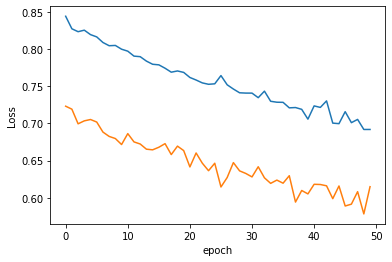

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(epochs), aggregated_losses)
plt.plot(range(epochs), loss_val)
plt.ylabel('Loss')
plt.xlabel('epoch');




In [ ]:
# I CAN"T MISSING CIO GRADE 
from sklearn.linear_model import LinearRegression
filter = ['2_rs9941697', '5_rs1347147' ,'19_rs3212986', '9_rs7851395', '17_rs1051640', '6_rs451774', '1_rs1801133&COSM146404&COSM3927609']
topclinical = ['AgeTreatmentInitiation (years)','CisplatinExactDuration (days)','Vincristine_Concomitant (1=yes,0=no)','HeadAndNeckRadiation (1=yes,0=no)']

remove = []
for i in range(len(data.x_snps_names)):
    if data.x_snps_names[i] not in filter:
        remove.append(i)

for i in range(len(data.x_clinical_names)):
  if data.x_clinical_names[i] not in clinical_filter:
    remove_c.append(i)

X = np.delete(data.x_snps, remove, axis=1)
colX = np.delete(data.x_snps_names, remove, axis=0)

Xc = np.delete(data.x_clinical,remove_c,axis = 1)
colXc = np.delete(data.x_clinical_names,remove_c, axis = 0)

y = data.y
scaler = MinMaxScaler()
Z = scaler.fit_transform(Xc)
X = np.concatenate([Z, X], axis=1)

y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.3, random_state=1) #8
model = LinearRegression().fit(X_train, y_train)    
